In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = [15, 7]

# Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

Проверим зависимость скорости схождения от типа стратегии.

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

strategies = ('best1bin','best1exp','rand1exp','randtobest1exp',
                 'currenttobest1exp','best2exp','rand2exp','randtobest1bin',
                 'currenttobest1bin','best2bin','rand2bin','rand1bin')

diff_result = []
for strategy in strategies:
    result = differential_evolution(ackley, bounds, seed=42, strategy=strategy)
    diff_result.append((result.nit, strategy))

sorted_strategy_with_iter = sorted(diff_result, reverse=True)
strategies = [strategy for n_iteration, strategy in sorted_strategy_with_iter]
n_iterations = [n_iteration for n_iteration, strategy in sorted_strategy_with_iter]

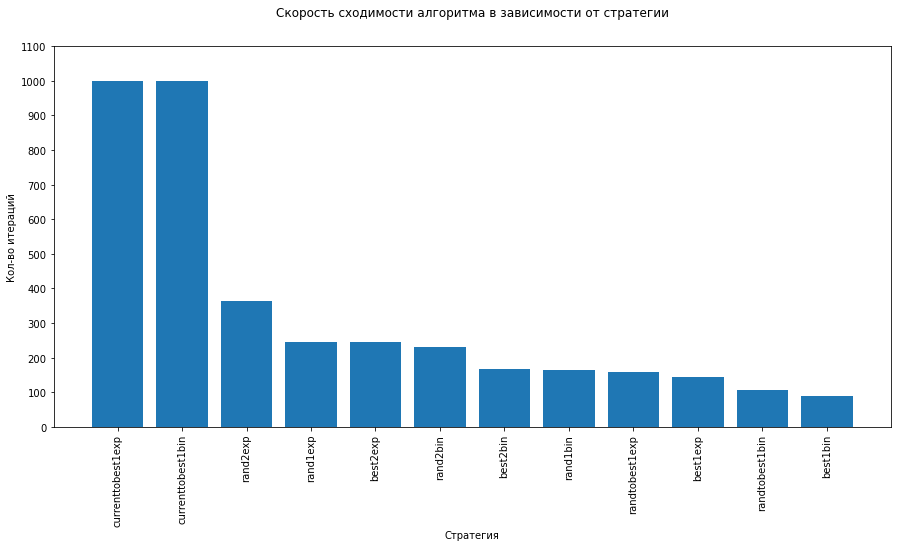

In [3]:
plt.bar(strategies, n_iterations)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1200, 100))
plt.title('Скорость сходимости алгоритма в зависимости от стратегии', pad=30)
plt.xlabel('Стратегия')
plt.ylabel('Кол-во итераций')
plt.show()

In [4]:
print(f'Самая трудозатратная стратегия для тестируемой функции:', 
      sorted_strategy_with_iter[0][1],
     ', количество итераций:', sorted_strategy_with_iter[0][0])
print(f'Самая оптимальная стратегия для тестируемой функции:', 
      sorted_strategy_with_iter[-1][1],
     ', количество итераций:', sorted_strategy_with_iter[-1][0])

Самая трудозатратная стратегия для тестируемой функции: currenttobest1exp , количество итераций: 1000
Самая оптимальная стратегия для тестируемой функции: best1bin , количество итераций: 89


Для анализа влияния размера популяции на скорость сходимости выбираем самую оптимальную стратегию: best1bin 

In [5]:
diff_result = []
for popsize in range(5, 100, 5):
    result = differential_evolution(ackley, bounds, seed=42, strategy='best1bin', popsize=popsize)
    diff_result.append((result.nit, popsize))

n_iterations = [n_iteration for n_iteration, popsize in diff_result]
popsize = [popsize for n_iteration, popsize in diff_result]

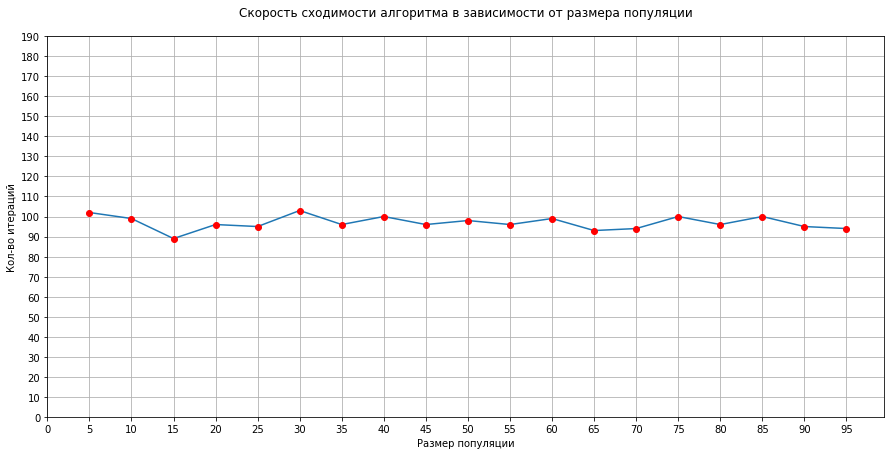

In [6]:
plt.plot(popsize, n_iterations)
plt.plot(popsize, n_iterations, 'ro')
plt.title('Скорость сходимости алгоритма в зависимости от размера популяции', pad=20)
plt.yticks(np.arange(0, 200, 10))
plt.xticks(np.arange(0, 100, 5))
plt.xlabel('Размер популяции')
plt.ylabel('Кол-во итераций')
plt.grid()
plt.show()

Из произведенного анализа зависимость скорости сходимости от размера популяции очень маленькая.

Проверим влияние на скорость сходимости параметра мутации. Исходя из документации увеличение размера мутации приводит к увеличению радиуска поиска и времени сходимости. При этом размер мутации можно задать как постоянным числом, так и промежутком, из которого значение будет выбрано случайным образом в каждой итерации.

Уровень мутации можно задать числом от [0, 2]

Попробуем сравнить между собой 2 варианта:
- размер мутации постоянный, увеличивается от 0.1 до 2 с шагом 0.1
- размер мутации случайный из диапазона от 0.1 до N, N увеличивается до 2 с шагом 0.1

In [7]:
diff_result_met1 = []
diff_result_met2 = []

for mutation in np.arange(0.1, 2, 0.1):
    
    result = differential_evolution(ackley, bounds, seed=42, strategy='best1bin', mutation=mutation)
    diff_result_met1.append((result.nit, mutation))
    
    result = differential_evolution(ackley, bounds, seed=42, strategy='best1bin', mutation=[0.1, mutation])
    diff_result_met2.append((result.nit, mutation))

n_iterations_met1 = [n_iteration for n_iteration, popsize in diff_result_met1]
n_iterations_met2 = [n_iteration for n_iteration, popsize in diff_result_met2]
mutations_met1 = [popsize for n_iteration, popsize in diff_result_met1]
mutations_met2 = [popsize for n_iteration, popsize in diff_result_met2]

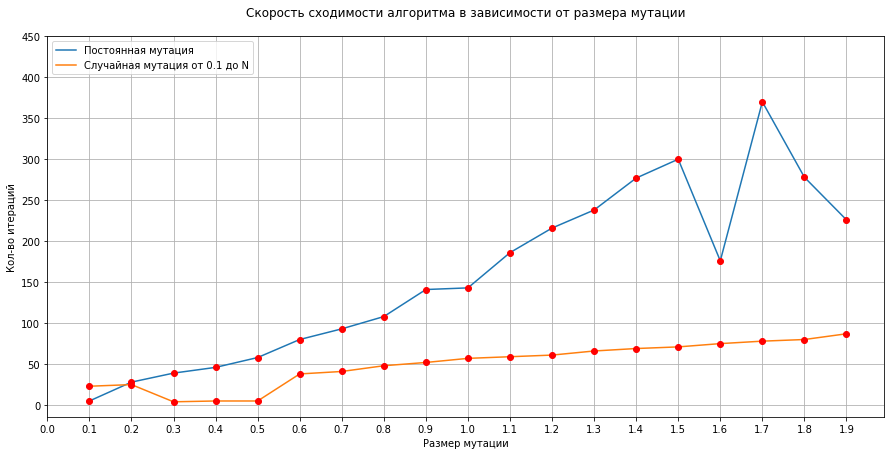

In [8]:
plt.plot(mutations_met1, n_iterations_met1, label='Постоянная мутация')
plt.plot(mutations_met1, n_iterations_met1, 'ro')
plt.plot(mutations_met2, n_iterations_met2, label='Случайная мутация от 0.1 до N')
plt.plot(mutations_met2, n_iterations_met2, 'ro')

plt.title('Скорость сходимости алгоритма в зависимости от размера мутации', pad=20)
plt.yticks(np.arange(0, 500, 50))
plt.xticks(np.arange(0, 2, 0.1))
plt.xlabel('Размер мутации')
plt.ylabel('Кол-во итераций')
plt.legend(loc='upper left')
plt.grid()

plt.show()

Как видно из полученных данных в случае постоянного значения мутации скорость сходимости значительно увеличивается при увеличении значения мутации. В случае со случайным выбором значения мутации из промежутка от 0.1 до N, скорость сходимости также увеличивается, но уже не так сильно.

Проверим как влияет на количество итераций параметр tol.

In [9]:
diff_result = []

for tol in np.arange(0.001, 1, 0.005):
    
    result = differential_evolution(ackley, bounds, seed=42, strategy='best1bin', tol=tol)
    diff_result.append((result.nit, tol))

n_iterations = [n_iteration for n_iteration, tol in diff_result]
tols = [tol for n_iteration, tol in diff_result]

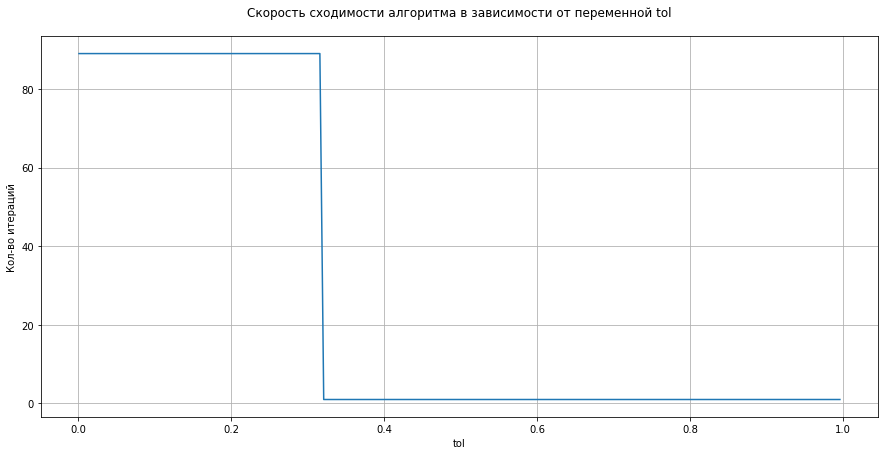

In [10]:
plt.plot(tols, n_iterations, label='Постоянная мутация')
plt.title('Скорость сходимости алгоритма в зависимости от переменной tol', pad=20)
plt.xlabel('tol')
plt.ylabel('Кол-во итераций')
plt.grid()
plt.show()

Как видно по графику параметр tol не влияет на количество итераций, но выше определенного значения количество итераций становится равным 1. Вероятно при этих значениях функция начинает давать некорректный результат по искомому минимуму.

Проверим как влияет параметр recombination на скорость сходимости. Этот параметр описывает вероятность замещения координаты изначального вектора на скрещенную координату. Чем выше значение вероятности, тем больше скрещенных координат попадет в исходный вектор. По документации, высокие значения могут дестабилизировать следующую популяцию.

In [11]:
diff_result = []
for recombination in np.arange(0.05, 1, 0.05):
    result = differential_evolution(ackley, bounds, seed=42, strategy='best1bin', recombination=recombination)
    diff_result.append((result.nit, recombination))

n_iterations = [n_iteration for n_iteration, popsize in diff_result]
recombinations = [popsize for n_iteration, popsize in diff_result]

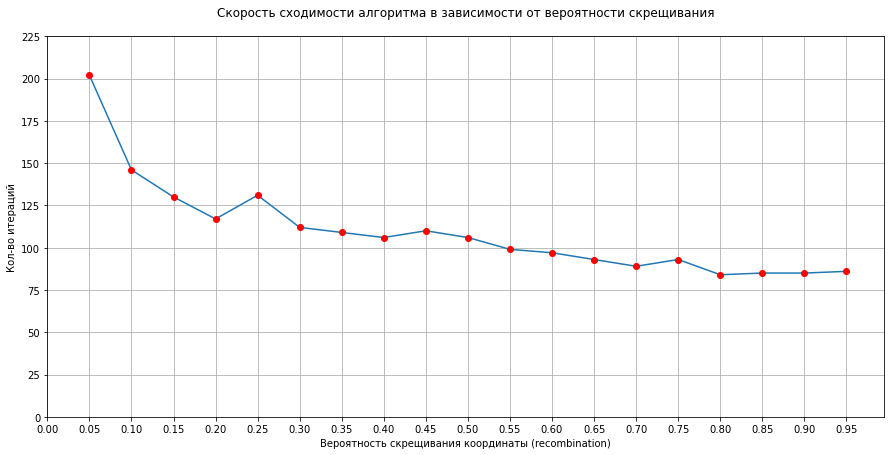

In [12]:
plt.plot(recombinations, n_iterations, label='Постоянная мутация')
plt.plot(recombinations, n_iterations, 'ro')

plt.title('Скорость сходимости алгоритма в зависимости от вероятности скрещивания', pad=20)
plt.yticks(np.arange(0, 250, 25))
plt.xticks(np.arange(0, 1, 0.05))
plt.xlabel('Вероятность скрещивания координаты (recombination)')
plt.ylabel('Кол-во итераций')
plt.grid()

plt.show()

Как видно из графика, оптимальное значение лежит в пределах от 0.65 до 0.80, так как на этом участке скорость сходимости почти перестает изменяться.

Проверим зависимость скорости сходимости алгоритма от метода обновления наилучшего вектора.

In [13]:
updating_params = ('immediate', 'deferred')

diff_result = []
for updating in updating_params:
    result = differential_evolution(ackley, bounds, seed=42, strategy='best1bin', updating=updating)
    diff_result.append(result.nit)

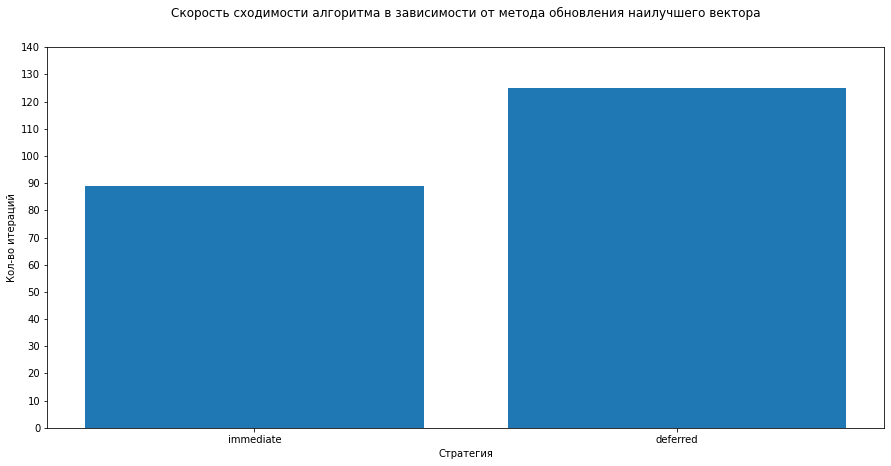

In [14]:
plt.bar(updating_params, diff_result)
plt.yticks(np.arange(0, 150, 10))
plt.title('Скорость сходимости алгоритма в зависимости от метода обновления наилучшего вектора', pad=30)
plt.xlabel('Стратегия')
plt.ylabel('Кол-во итераций')
plt.show()

Как видно из полученых графиков наш алгоритм быстрее сходится при постоянном обновлении наилучшего вектора в популяции, а не в случае разового обновления в одной итерации.

Исходя из полученных данных попробуем подобрать оптимальные параметры для наискорейшего схождения нашего алгоритма.

Для подбора параметров будем руководствоваться следующими соображениями:
- минимум функции достигается в точке (0,0)
- подобранные параметры функции должны выдать наименьшее количество итераций и должна быть найдена точная координата минимума

In [15]:
bounds = [(-10, 10), (-10, 10)]
differential_evolution(ackley, bounds, seed=42, 
                       strategy='best1bin',
                       popsize=95,
                       tol=0.01,
                       mutation=0.1,
                       recombination=0.76,
                       updating='immediate')

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4053
     nit: 20
 success: True
       x: array([0., 0.])